# EE 449 HW-1

### Utils.py  
Necessary tools for grading and testing <br>
Provided by the course

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import os
import torch
from torchvision.utils import make_grid
from sklearn.datasets import make_blobs

def part1CreateDataset(train_samples=1000, val_samples=100, std=0.4):
    # CREATE A RANDOM DATASET

    centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]] #center of each class
    cluster_std = std # standard deviation of random gaussian samples

    x_train, y_train = make_blobs(n_samples=train_samples, centers=centers, n_features=2, cluster_std=cluster_std, shuffle=True)
    y_train[y_train==2] = 0 # make this an xor problem
    y_train[y_train==3] = 1 # make this an xor problem
    y_train = y_train.reshape(-1, 1) #vectorize the ground truth

    x_val, y_val = make_blobs(n_samples=val_samples, centers=centers, n_features=2, cluster_std=cluster_std, shuffle=True)
    y_val[y_val==2] = 0 # make this an xor problem
    y_val[y_val==3] = 1 # make this an xor problem
    y_val = y_val.reshape(-1, 1) # vectorize the ground truth

    return x_train, y_train, x_val, y_val

def part1PlotBoundary(X, y, nn):

    # Plot decision boundary
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['lightcoral', 'lightblue'], alpha=0.5)

    # Add contour lines
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdYlBu)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

# utility function to create performance plots for part 2
def part2Plots(out, nmax=64, save_dir='', filename=''):
    out = torch.tensor(out).reshape(-1,1,25,25)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((out.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    fig.savefig(os.path.join(save_dir, filename + '.png'))


# utility function to create performance plots for part 3
def part3Plots(results, save_dir='', filename='', show_plot=True):
    """plots multiple performance curves from multiple training results and
    saves the resultant plot as a png image

    Arguments:
    ----------

    results: list of dictionary objects, each corresponds to
    the result of a training and should have the following key-value
    items:

        'name': string, indicating the user-defined name of the training

        'loss_curve': list of floats, indicating the loss at each step

        'train_acc_curve': list of floats, indicating the the training accuracy at each step

        'val_acc_curve': list of floats indicating the the validation accuracy at each step

        'test_acc': float, indicating the best test accuracy

        'weights': (not used), 2-D float array, weights of the first hidden layer of the trained MLP

    save_dir: string, indicating the path to directory where the plot image is to be saved

    filename: string, indicating the name of the image file. Note that .png will be automatically
    appended to the filename.

    show_plot: bool, whether the figure is to be shown

    Example:
    --------

    visualizing the results of the training

    # assume the '*_value's are known

    >>> result_x = {'name': name_value, 'loss_curve': loss_curve_value,
                    'train_acc_curve': train_acc_curve_value,
                     'val_acc_curve': val_acc_curve_value,
                     'test_acc': test_acc_value}

    >>> results = [result_1, ..., result_x, ..., result_N]

    >>> part2Plots(results, save_dir=r'some\location\to\save', filename='part2Plots')

    """

    color_list = ['#0000ff', '#ff0000', '#d2691e', '#ff00ff', '#00ff00', '#000000', '#373788']
    style_list = ['-', '--']

    num_results = len(results)

    plot_curve_args = [{'c': color_list[k],
                        'linestyle': style_list[0],
                        'linewidth': 2} for k in range(num_results)]

    plot_point_args = [{'c': color_list[k],
                        'marker': 'o',
                        'markersize': 9,
                        'markerfacecolor':  color_list[k]} for k in range(num_results)]



    font_size = 18

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))


    # training loss
    ax = axes[0, 0]
    ax.set_title('training_loss', loc='left', fontsize=font_size)
    for result, args in zip(results, plot_curve_args):
        ax.plot(np.arange(1, len(result['loss_curve']) + 1), result['loss_curve'], label=result['name'], **args)
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='loss', fontsize=font_size)
        ax.tick_params(labelsize=12)

    # get lines for global legend
    lines = ax.get_lines()


    # training and validation accuracy
    ax = axes[0, 1]
    ax.set_title('train_and_val_accuracies', loc='right', fontsize=font_size)
    for result, args in zip(results, plot_curve_args):
        ax.plot(np.arange(1, len(result['train_acc_curve']) + 1), result['train_acc_curve'], label=result['name'],
                **args)
        args['linestyle'] = style_list[1]
        ax.plot(np.arange(1, len(result['val_acc_curve']) + 1), result['val_acc_curve'], label=result['name'],
                **args)
        args['linestyle'] = style_list[0]
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='acc.', fontsize=font_size)
        ax.tick_params(labelsize=12)

        legend_elements = [Line2D([0], [0], color='k', linestyle=style_list[0], lw=2, label='train.'),
                           Line2D([0], [0], color='k', linestyle=style_list[1], lw=2, label='val.')]

        ax.legend(fontsize=12, loc='best', handles=legend_elements)

    # validation vs training accuracy
    ax = axes[1, 1]
    ax.set_title('validation_vs_training_accuracy', loc='right', fontsize=font_size)
    for result, args in zip(results, plot_curve_args):
        ax.plot(result['train_acc_curve'], result['val_acc_curve'], label=result['name'], **args)
        ax.set_xlabel(xlabel='training', fontsize=font_size)
        ax.set_ylabel(ylabel='validation', fontsize=font_size)
        ax.tick_params(labelsize=12)



    # test vs training accuracy
    ax = axes[1, 0]
    ax.set_title('test_vs_training_accuracy', loc='left', fontsize=font_size)
    for result, args in zip(results, plot_point_args):
        train_acc = result['train_acc_curve'][-1]
        test_acc = result['test_acc']
        ax.plot(train_acc, test_acc, label=result['name'],  **args)
        ax.set_xlabel(xlabel='training', fontsize=font_size)
        ax.set_ylabel(ylabel='test', fontsize=font_size)
        ax.tick_params(labelsize=12)

    # global legend
    fig.legend(labels=[line._label for line in lines],
               ncol=3, loc="upper center", fontsize=font_size,
               handles=lines)

    if show_plot:
        plt.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to create performance plots for part 4
def part4Plots(results, save_dir='', filename='', show_plot=True):
    """plots multiple performance curves from multiple training results and
    saves the resultant plot as a png image

    Arguments:
    ----------

    results: list of dictionary objects, each corresponds to
    the result of a training and should have the following key-value
    items:

        'name': string, indicating the user-defined name of the training

        'relu_loss_curve': list of floats, indicating the loss at each step

        'sigmoid_loss_curve': list of floats, indicating the loss at each step

        'relu_grad_curve': list of floats, indicating the gradient magnitude at each step

        'sigmoid_grad_curve': list of floats, indicating the gradient magnitude at each step

    save_dir: string, indicating the path to directory where the plot image is to be saved

    filename: string, indicating the name of the image file. Note that .png will be automatically
    appended to the filename.

    show_plot: bool, whether the figure is to be shown

    Example:
    --------

    visualizing the results of the training

    # assume the '*_value's are known

    >>> result_x = {'name': name_value, 'relu_loss_curve': relu_loss_curve_value,
                    'sigmoid_loss_curve': sigmoid_loss_curve_value,
                     'relu_grad_curve': relu_grad_curve_value}

    >>> results = [result_1, ..., result_x, ..., result_N]

    >>> part3Plots(results, save_dir=r'some\location\to\save', filename='part3Plots')

    """

    color_list = ['#0000ff', '#ff0000', '#d2691e', '#ff00ff', '#00ff00', '#000000', '#373788']
    style_list = ['-', '--']

    num_results = len(results)

    relu_curve_args = [{'c': color_list[k],
                        'linestyle': style_list[0],
                        'linewidth': 2} for k in range(num_results)]

    sigmoid_curve_args = [{'c': color_list[k],
                        'linestyle': style_list[1],
                        'linewidth': 2} for k in range(num_results)]



    font_size = 18

    fig, axes = plt.subplots(1, 2, figsize=(16, 12))

    legend_elements = [Line2D([0], [0], color='k', linestyle=style_list[0], lw=2, label='ReLU'),
                       Line2D([0], [0], color='k', linestyle=style_list[1], lw=2, label='Sigmoid')]

    # training loss
    ax = axes[0]
    ax.set_title('training_losses', loc='left', fontsize=font_size)
    for result, relu_args, sigmoid_args in zip(results, relu_curve_args, sigmoid_curve_args):
        ax.plot(np.arange(1, len(result['relu_loss_curve']) + 1),
                result['relu_loss_curve'], label=result['name'], **relu_args)
        ax.plot(np.arange(1, len(result['sigmoid_loss_curve']) + 1),
                result['sigmoid_loss_curve'], label=result['name'], **sigmoid_args)
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='loss', fontsize=font_size)
        ax.tick_params(labelsize=12)
        ax.legend(loc='upper left', fontsize=12, handles=legend_elements)

    # gradient magnitude
    ax = axes[1]
    ax.set_title('gradient_magnitudes', loc='right', fontsize=font_size)
    for result, relu_args, sigmoid_args in zip(results, relu_curve_args, sigmoid_curve_args):
        ax.plot(np.arange(1, len(result['relu_grad_curve']) + 1),
                result['relu_grad_curve'], label=result['name'], **relu_args)
        ax.plot(np.arange(1, len(result['sigmoid_grad_curve']) + 1),
                result['sigmoid_grad_curve'], label=result['name'], **sigmoid_args)
        ax.set_xlabel(xlabel='step', fontsize=font_size)
        ax.set_ylabel(ylabel='|grad_loss|', fontsize=font_size)
        ax.tick_params(labelsize=12)
        ax.legend(loc='upper right', fontsize=12, handles=legend_elements)

    # global legend
    lines = ax.get_lines()[::2]
    fig.legend(labels=[line._label for line in lines],
               ncol=3, loc="upper center", fontsize=font_size,
               handles=lines)

    if show_plot:
        plt.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to create performance plots for part 5
def part5Plots(result, save_dir='', filename='', show_plot=True):
    """plots multiple performance curves from multiple training results and
    saves the resultant plot as a png image

    Arguments:
    ----------

    result: dictionary object, each corresponds to
    the result of a training and should have the following key-value
    items:

        'name': string, indicating the user-defined name of the training

        'loss_curve_1': list of floats, indicating the loss with .1 lr at each step

        'loss_curve_01': list of floats, indicating the loss with .01 lr at each step

        'loss_curve_001': list of floats, indicating the loss with .001 lr at each step

        'val_acc_curve_1': list of floats, indicating the val acc with .1 lr at each step

        'val_acc_curve_01': list of floats, indicating the val acc with .01 lr at each step

        'val_acc_curve_001': list of floats, indicating the val acc with .001 lr at each step

    save_dir: string, indicating the path to directory where the plot image is to be saved

    filename: string, indicating the name of the image file. Note that .png will be automatically
    appended to the filename.

    show_plot: bool, whether the figure is to be shown

    Example:
    --------

    visualizing the results of the training

    # assume the '*_value's are known

    >>> result = {'name': name_value, 'loss_curve_1': loss_curve_1_value, ...}

    >>> part4Plots(result, save_dir=r'some\location\to\save', filename='part4Plots')

    """

    if isinstance(result, (list, tuple)):
        result = result[0]

    color_list = ['#0000ff', '#ff0000', '#d2691e', '#ff00ff', '#00ff00', '#000000', '#373788']
    style_list = ['-', '--']

    num_curves = 3

    plot_args = [{'c': color_list[k],
                        'linestyle': style_list[0],
                        'linewidth': 2} for k in range(num_curves)]


    key_suffixes = ['1', '01', '001']


    font_size = 18

    fig, axes = plt.subplots(1, 2, figsize=(16, 12))

    fig.suptitle('training of <%s> with different learning rates'%result['name'],
                 fontsize=font_size, y=0.025)

    # training loss and validation accuracy
    axes[0].set_title('training_losses', loc='left', fontsize=font_size)
    axes[1].set_title('validation_accuracies', loc='right', fontsize=font_size)
    for key_suffix, plot_args in zip(key_suffixes, plot_args):

        loss_curve = result['loss_curve_' + key_suffix]
        acc_curve = result['val_acc_curve_' + key_suffix]
        label = 'lr=0.%s'%key_suffix

        axes[0].plot(np.arange(1, len(loss_curve) + 1),
                     loss_curve, label=label, **plot_args)
        axes[0].set_xlabel(xlabel='step', fontsize=font_size)
        axes[0].set_ylabel(ylabel='loss', fontsize=font_size)
        axes[0].tick_params(labelsize=12)

        axes[1].plot(np.arange(1, len(acc_curve) + 1),
                     acc_curve, label=label, **plot_args)
        axes[1].set_xlabel(xlabel='step', fontsize=font_size)
        axes[1].set_ylabel(ylabel='accuracy', fontsize=font_size)
        axes[1].tick_params(labelsize=12)


    # global legend
    lines = axes[0].get_lines()
    fig.legend(labels=[line._label for line in lines],
               ncol=3, loc="upper center", fontsize=font_size,
               handles=lines)

    if show_plot:
        plt.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to visualize learned weights
def visualizeWeights(weights, save_dir, filename='weigths'):
    '''visualizes the weights and saves the visualization as a png image

    Arguments:
    ----------
    weights : numpy array of size 784 x D where D is the number of weights
    save_dir : string, path to directory to save the image
    filename : strint, name of the saved image (.png is to be appended automatically)

    Example:
    --------
    visualizing weights at the input layer of a keras.Model object

    # assume classifier is an instance of keras.Model

    >>> weights = classifier.trainable_weights[0].numpy()

    >>> visualizeWeights(weights, save_dir='some\location\to\save', filename='input_weights')
    '''

    weights = weights.T

    num_weights = weights.shape[-1]

    dim = np.ceil(np.sqrt(num_weights)).astype(int)

    fig, axes = plt.subplots(dim, dim)

    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = weights.min(), weights.max()
    for coef, ax in zip(weights.T, axes[:num_weights].ravel()):
        coef = np.squeeze(coef).T if len(weights.shape) > 2 else coef.reshape(28, 28)
        ax.matshow(coef, cmap=plt.cm.gray, vmin=.5 * vmin,
                   vmax=.5 * vmax)

        ax.set_xticks(())
        ax.set_yticks(())

    fig.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))

# utility function to visualize dataset
def visualizeDataset(images, labels, save_dir, filename='dataset', num_samples_per_class=8):

    num_classes = np.max(labels) + 1

    fig, axes = plt.subplots(num_classes, num_samples_per_class)

    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    for r in range(num_classes):
        sample_indcs = np.where(labels == r)[0][:num_samples_per_class]
        for n in range(num_samples_per_class):
            axes[r, n].matshow(images[sample_indcs[n]].reshape(28, 28),
                               cmap=plt.cm.gray)
            axes[r, n].set_xticks(())
            axes[r, n].set_yticks(())

    fig.show()

    fig.savefig(os.path.join(save_dir, filename + '.png'))


### 1.1 Preliminaries
function definitions for activation functions

In [5]:
x = np.linspace(-5, 5, 100)

y1 = (np.exp(2*x)-1)/(np.exp(2*x)+1) #Tanh function
y2 = 1/(1+np.exp(-x)) #Sigmoid function
y3 = np.maximum(0,x) #ReLU function
dy1 = (4*np.exp(2*x))/np.square((np.exp(2*x)+1)) #Derivative of tanh function
dy2 = (np.exp(-x))/np.square((np.exp(-x)+1))#Derivative of sigmoid function
#dy2 = y2*(1-y2) #An alternative for sigmoid derivative
dy3 = np.where(x > 0, 1, 0) #Derivative of ReLU function

plots

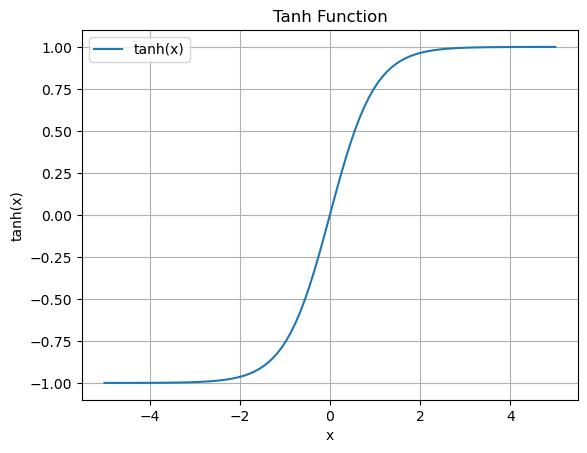

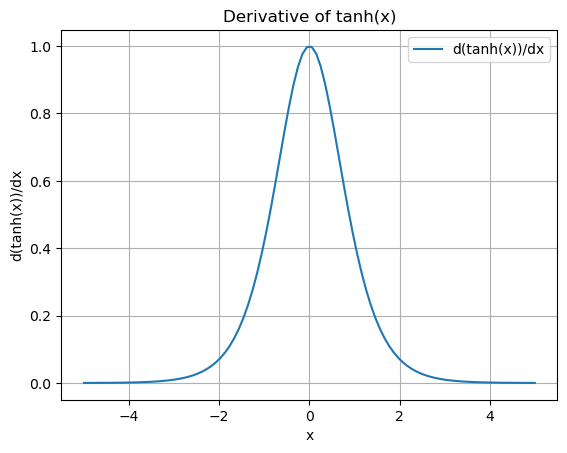

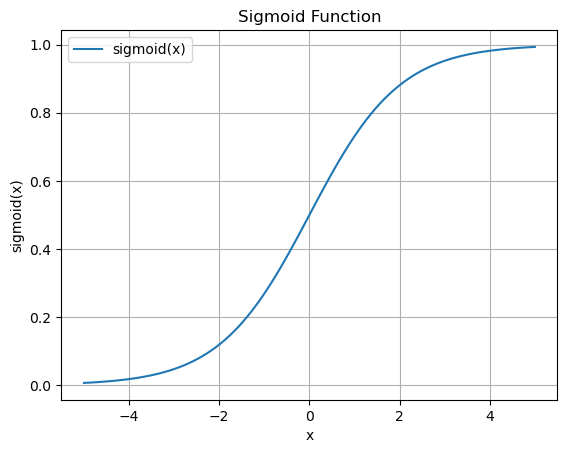

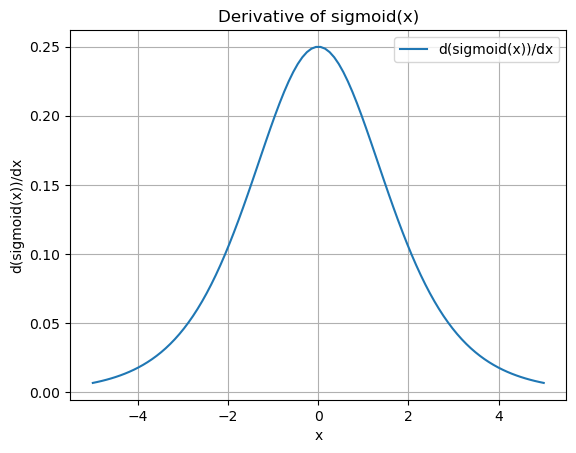

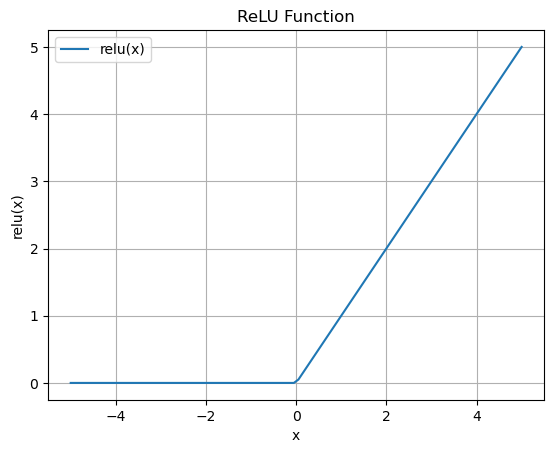

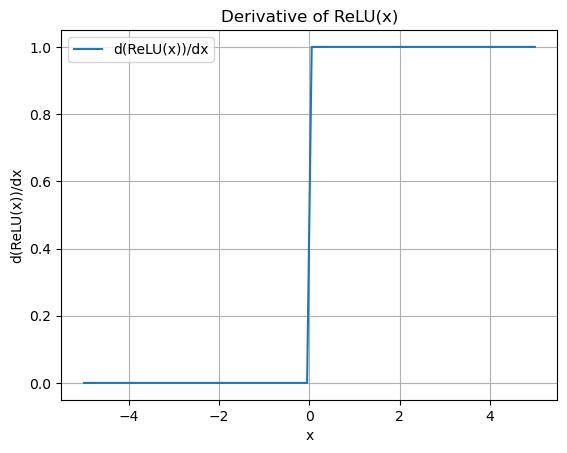

In [6]:
plt.plot(x, y1, label='tanh(x)') # tanh function
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, dy1, label='d(tanh(x))/dx') # derivative of tanh function
plt.xlabel('x')
plt.ylabel('d(tanh(x))/dx')
plt.title('Derivative of tanh(x)')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, y2, label='sigmoid(x)') # sigmoid function
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, dy2, label='d(sigmoid(x))/dx') # derivative of sigmoid function
plt.xlabel('x')
plt.ylabel('d(sigmoid(x))/dx')
plt.title('Derivative of sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, y3, label='relu(x)') # ReLU function
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('ReLU Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(x, dy3, label='d(ReLU(x))/dx') # derivative of ReLU function
plt.xlabel('x')
plt.ylabel('d(ReLU(x))/dx')
plt.title('Derivative of ReLU(x)')
plt.grid(True)
plt.legend()
plt.show()

### 1.2 Implementation

MLP class definition

In [11]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x): #sigmoid
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x): #derivative of sigmoid
        return (self.sigmoid(x) * (1 - self.sigmoid(x)))

    def tanh(self, x): #tanh
        return (np.exp(2*x)-1)/(np.exp(2*x)+1)
    def tanh_derivative(self, x): #derivative of tanh
        return (4*np.exp(2*x))/np.square((np.exp(2*x)+1))

    def ReLU(self, x): #ReLU
        return np.maximum(0,x)
    def ReLU_derivative(self, x): #derivative of ReLU
        return np.where(x > 0, 1, 0)

    def forward(self, inputs):
        # Forward pass through the network
        self.input = self.sigmoid(inputs)

        self.pre_activation_hidden = np.dot(self.input, self.weights_input_hidden) + self.bias_hidden #pre-activated values of hidden nodes for error calculation
        self.hidden_output = self.sigmoid(self.pre_activation_hidden) #output of hidden nodes

        self.pre_activation_output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output #pre-activated values of output nodes for error calculation
        self.output = (self.sigmoid(self.pre_activation_output) > 0.5) #output value rounded to 1 or 0 in order to classify output
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        self.input = self.sigmoid(inputs)

        output_error = (targets - self.output) * self.sigmoid_derivative(self.pre_activation_output)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.pre_activation_hidden)

        # Compute gradients
        output_delta = learning_rate * np.dot(self.hidden_output.T, output_error)
        hidden_delta = learning_rate * np.dot(self.input.T, hidden_error)

        # Update weights and biases
        self.weights_hidden_output += output_delta
        self.bias_output += learning_rate * np.mean(output_error, axis=0, keepdims=True)
        self.weights_input_hidden += hidden_delta
        self.bias_hidden += learning_rate * np.mean(hidden_error, axis=0, keepdims=True)


XOR dataset

In [9]:
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

Test the network

Epoch 0: Loss = 0.5
Epoch 1000: Loss = 0.5
Epoch 2000: Loss = 0.497
Epoch 3000: Loss = 0.492
Epoch 4000: Loss = 0.503
Epoch 5000: Loss = 0.034
Epoch 6000: Loss = 0.027
Epoch 7000: Loss = 0.03
Epoch 8000: Loss = 0.027
Epoch 9000: Loss = 0.028
99.0 % of test examples classified correctly.


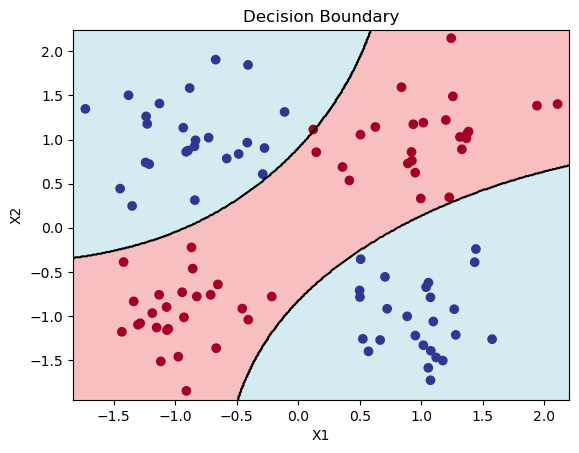

In [12]:
  # Define neural network parameters
  input_size = 2
  hidden_size = 4
  output_size = 1
  learning_rate = 0.001

  # Create neural network
  nn = MLP(input_size, hidden_size, output_size)

  # Train the neural network
  for epoch in range(10000):
     # Forward propagation
     output = nn.forward(x_train)
     # Backpropagation
     nn.backward(x_train, y_train, learning_rate)
     # Print the loss (MSE) every 1000 epochs
     if epoch % 1000 == 0:
        loss = np.mean((y_train - nn.forward(x_train)) ** 2)
        print(f'Epoch {epoch}: Loss = {loss}')

  # Test the trained neural network
  y_predict = nn.forward(x_val)
  print(f"{np.mean(y_predict==y_val)*100} % of test examples classified correctly.")

  part1PlotBoundary(x_val, y_val, nn)

### 2.1 Experimental Work

definition of my_conv2d function

In [16]:
def my_conv2d(input, kernel):
    # Initialize output with zeros
    output = np.zeros((input.shape[0], kernel.shape[0], input.shape[2] - kernel.shape[2] + 1, input.shape[3] - kernel.shape[3] + 1))

    # Perform convolution
    for b in range(input.shape[0]):
        for oc in range(kernel.shape[0]):
            for oh in range(output.shape[2]):
                for ow in range(output.shape[3]):
                    # Extract input region
                    input_region = input[b, :, oh:oh + kernel.shape[2], ow:ow + kernel.shape[3]]

                    # Perform convolution for each input channel
                    for ic in range(input.shape[1]):
                        output[b, oc, oh, ow] += np.sum(input_region[:, ic] * kernel[oc, ic])

    return output

pytorch control

In [13]:
import torch
print(torch.__version__)

2.2.2+cu121


implementation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


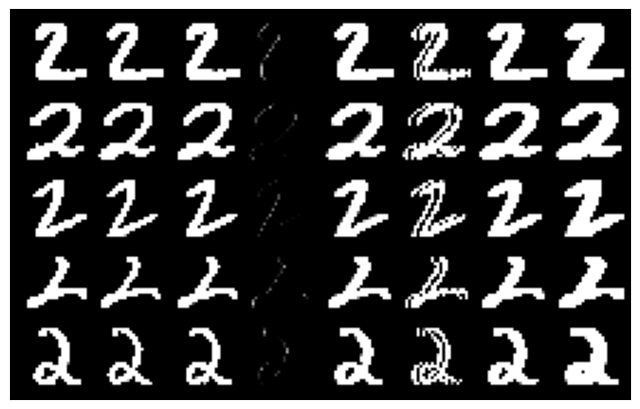

In [17]:
import numpy as np
# input shape: [batch size, input_channels, input_height, input_width]
input=np.load("samples_2.npy")
# input shape: [output_channels, input_channels, filter_height, filter width]
kernel=np.load("kernel.npy")
out = my_conv2d(input, kernel)

part2Plots(out)